In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

data_sets = []  # placeholder list
datalist = pickle.load(open("raw_data.pickle", "rb"))  # load data from first step

leagues = ['epl', 'la_liga', 'bundesliga', 'serie_a', 'ligue_1', 'rfpl']  # list of all leagues

# main loop through every league to create one single dataset and remove duplicated matches
for i in range(0, len(datalist)):

    df = datalist[i]
    df = pd.concat(df)
    df['league'] = leagues[i]
    df['match_id']=df['team_h']+ df['team_a']  # creating unique match id with the team names
    df['match_id'] = [''.join(sorted(s)) for s in df['match_id']]
    df = df.drop_duplicates(['match_id','datetime'])  # removing duplicated fields if both match id (playing teams) and timestamp are identical
    df = df.reset_index(drop=True)
    
    data_sets.append(df)  # clean data from every season and append to new list

# merge data
data = pd.concat(data_sets)

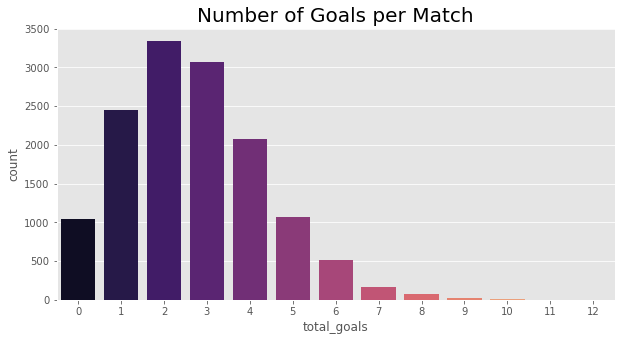

,goals_h,goals_a,total_goals
count,13860.000000,13860.000000,13860.000000
mean,1.508802,1.179221,2.688023
std,1.306705,1.153079,1.663152
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,1.000000,3.000000
75%,2.000000,2.000000,4.000000
max,10.000000,9.000000,12.000000


In [2]:
# Plotting total goals per match distribution

data['total_goals'] = data['goals_h'] + data['goals_a']

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['total_goals'], palette = 'magma')
plt.title('Number of Goals per Match', fontsize = 20)
plt.xlabel('Total Goals', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

data[['goals_h', 'goals_a', 'total_goals']].describe()


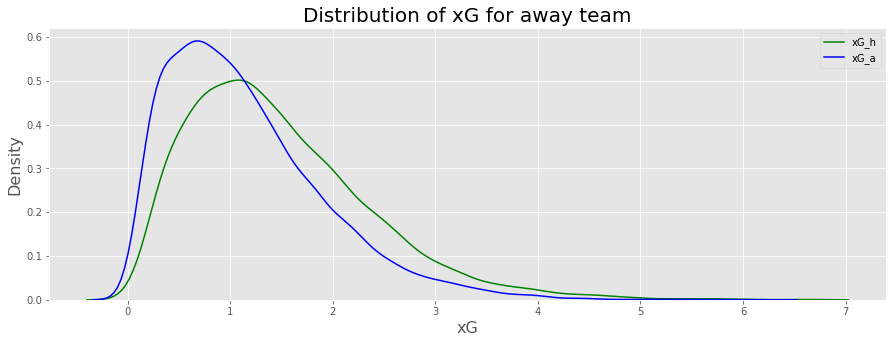

In [3]:
# Comparing distribution of xG of teams playing home and away

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['xG_h'], color = 'green', hist = False)
sns.distplot(data['xG_a'], color = 'blue', hist = False)
plt.xlabel('xG', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.title('Distribution of xG for away team', fontsize = 20)
plt.legend(['xG_h', 'xG_a'])
plt.show()

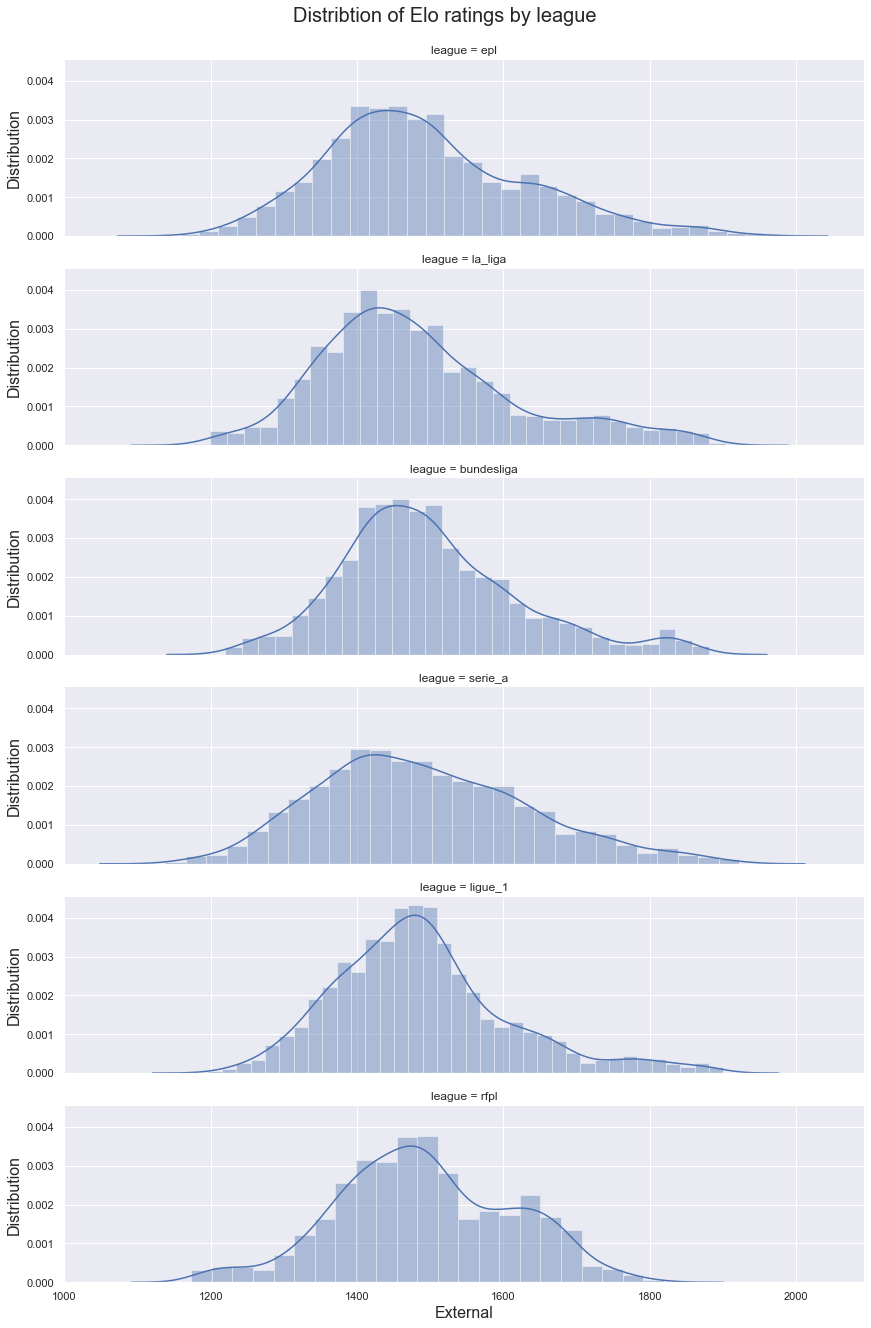

In [39]:
# Plotting distribution of team elo ratings by league

g = sns.FacetGrid(data, row="league", aspect=4)
g.map(sns.distplot, "elo_h")

for i in range (0, len(g.axes)):
    g.axes[i,0].set_ylabel('Distribution', fontsize = 16)
    
g.axes[i,0].set_xlabel("External", fontsize = 16)
g.fig.suptitle("Distribtion of Elo ratings by league", y=1.02, fontsize = 20)
plt.show()

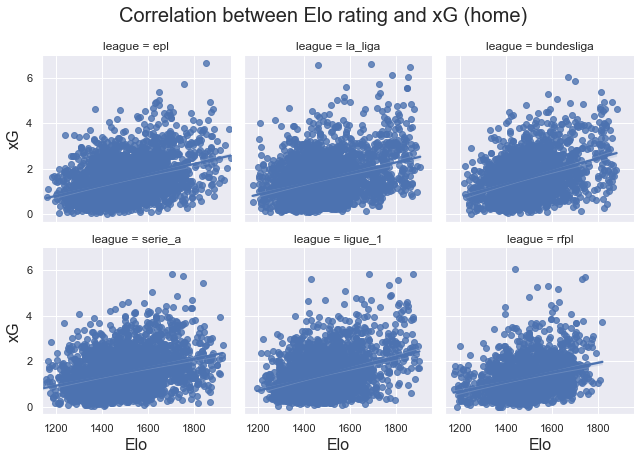

In [37]:
# Plotting scatter plot between Elo (home team) and xG (home team) by league

g = sns.FacetGrid(data, col="league", col_wrap=3)
g.map(sns.regplot, "elo_h", "xG_h")
g.fig.suptitle("Correlation between Elo rating and xG (home)", y=1.05, fontsize = 20)
for i in range (0, len(g.axes), 3):
    g.axes[i].set_ylabel('xG', fontsize = 16)
for i in range (3, len(g.axes), 1):
    g.axes[i].set_xlabel('Elo', fontsize = 16)
plt.show()

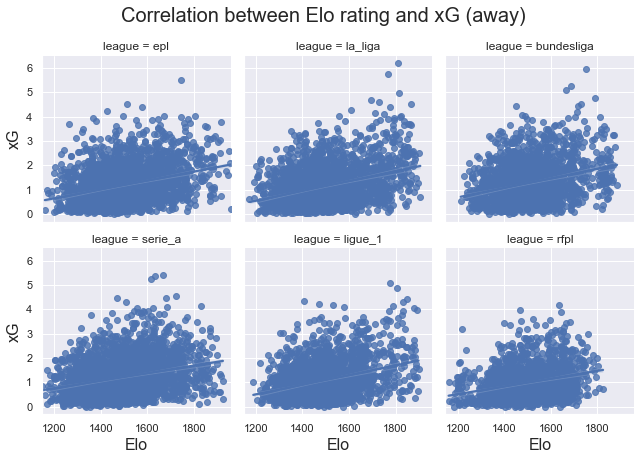

In [35]:
# Plotting scatter plot between Elo (away team) and xG (away team) by league

g = sns.FacetGrid(data, col="league", col_wrap=3)
g.map(sns.regplot, "elo_a", "xG_a")
g.fig.suptitle("Correlation between Elo rating and xG (away)", y=1.05, fontsize = 20)
for i in range (0, len(g.axes), 3):
    g.axes[i].set_ylabel('xG', fontsize = 16)
for i in range (3, len(g.axes), 1):
    g.axes[i].set_xlabel('Elo', fontsize = 16)
plt.show()

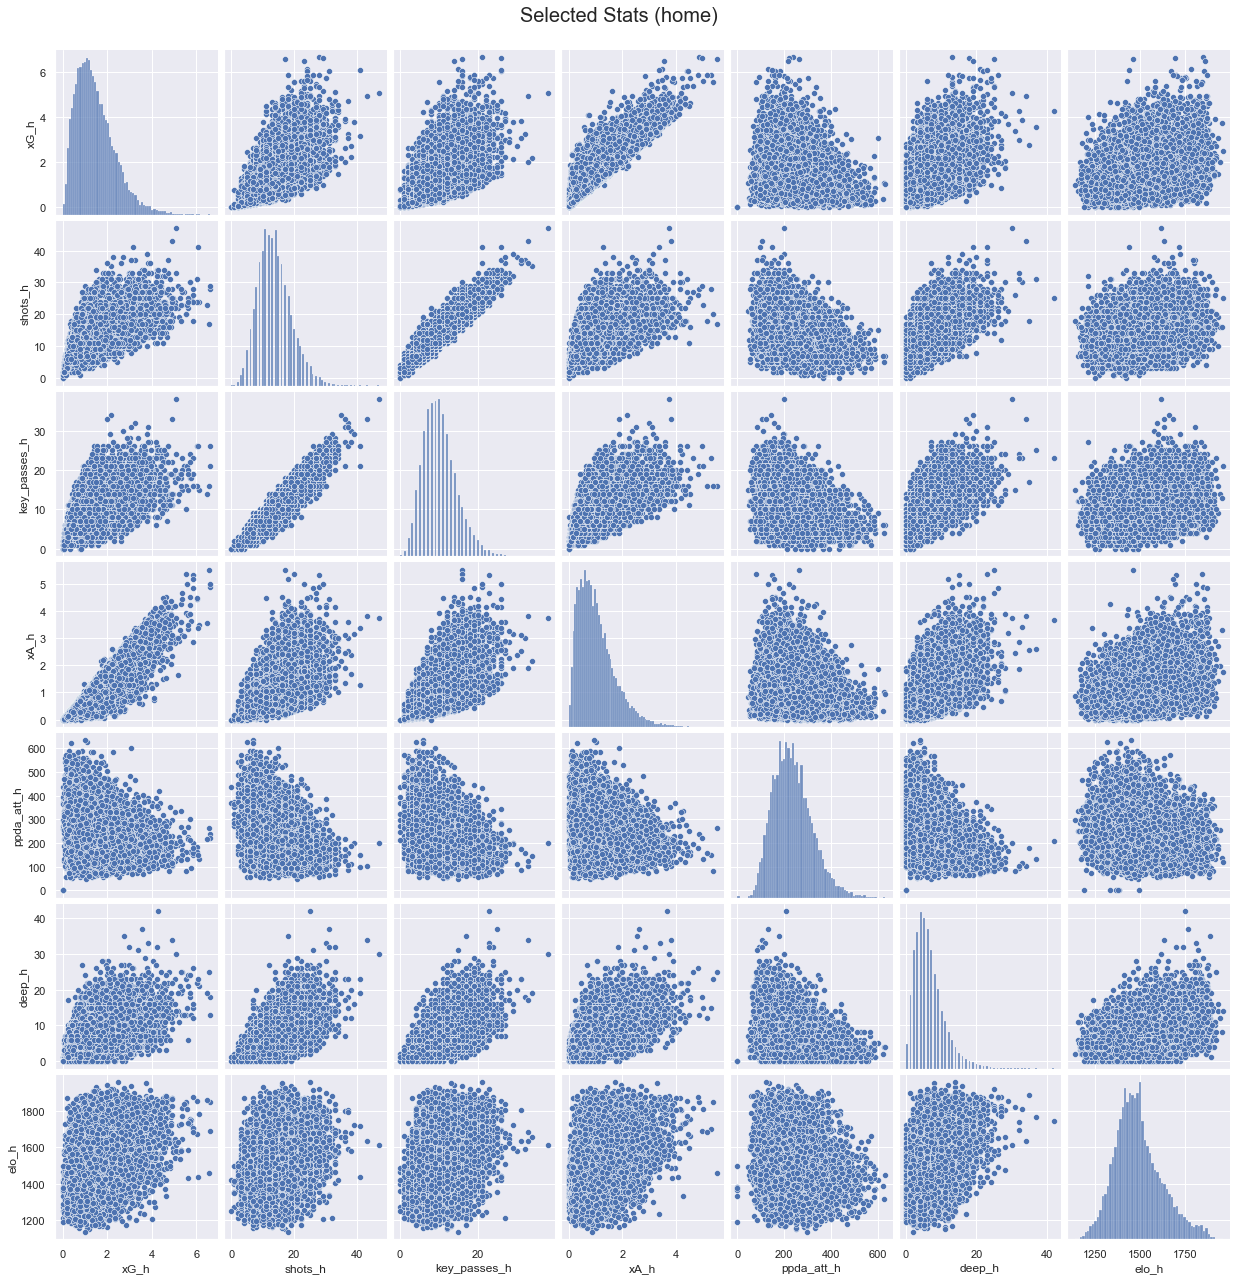

In [49]:
# Plotting pairplot for selected home team stats

sns.set()
cols = ['xG_h', 'shots_h', 'key_passes_h', 'xA_h', 'ppda_att_h', 'deep_h', 'elo_h']
g = sns.pairplot(data[cols], size = 2.5)
g.fig.suptitle("Selected Stats (home)", y=1.02, fontsize = 20)
plt.show()

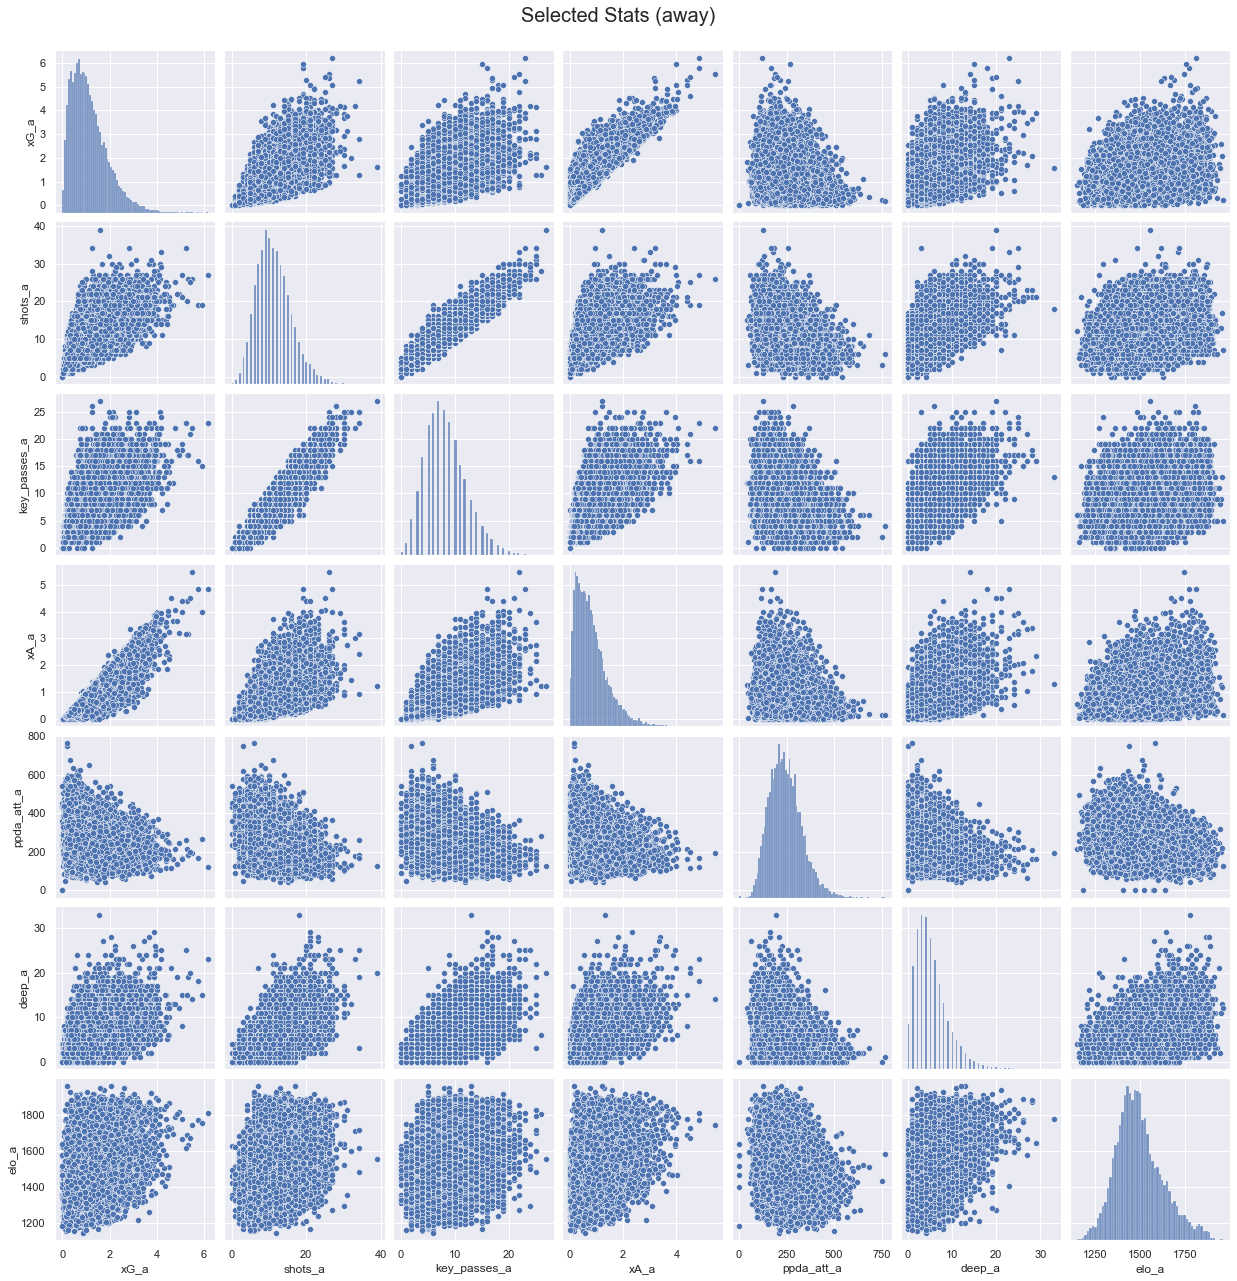

In [50]:
# Plotting pairplot for selected away team stats

sns.set()
cols = ['xG_a', 'shots_a', 'key_passes_a', 'xA_a', 'ppda_att_a', 'deep_a', 'elo_a']
g = sns.pairplot(data[cols], size = 2.5)
g.fig.suptitle("Selected Stats (away)", y=1.02, fontsize = 20)
plt.show()

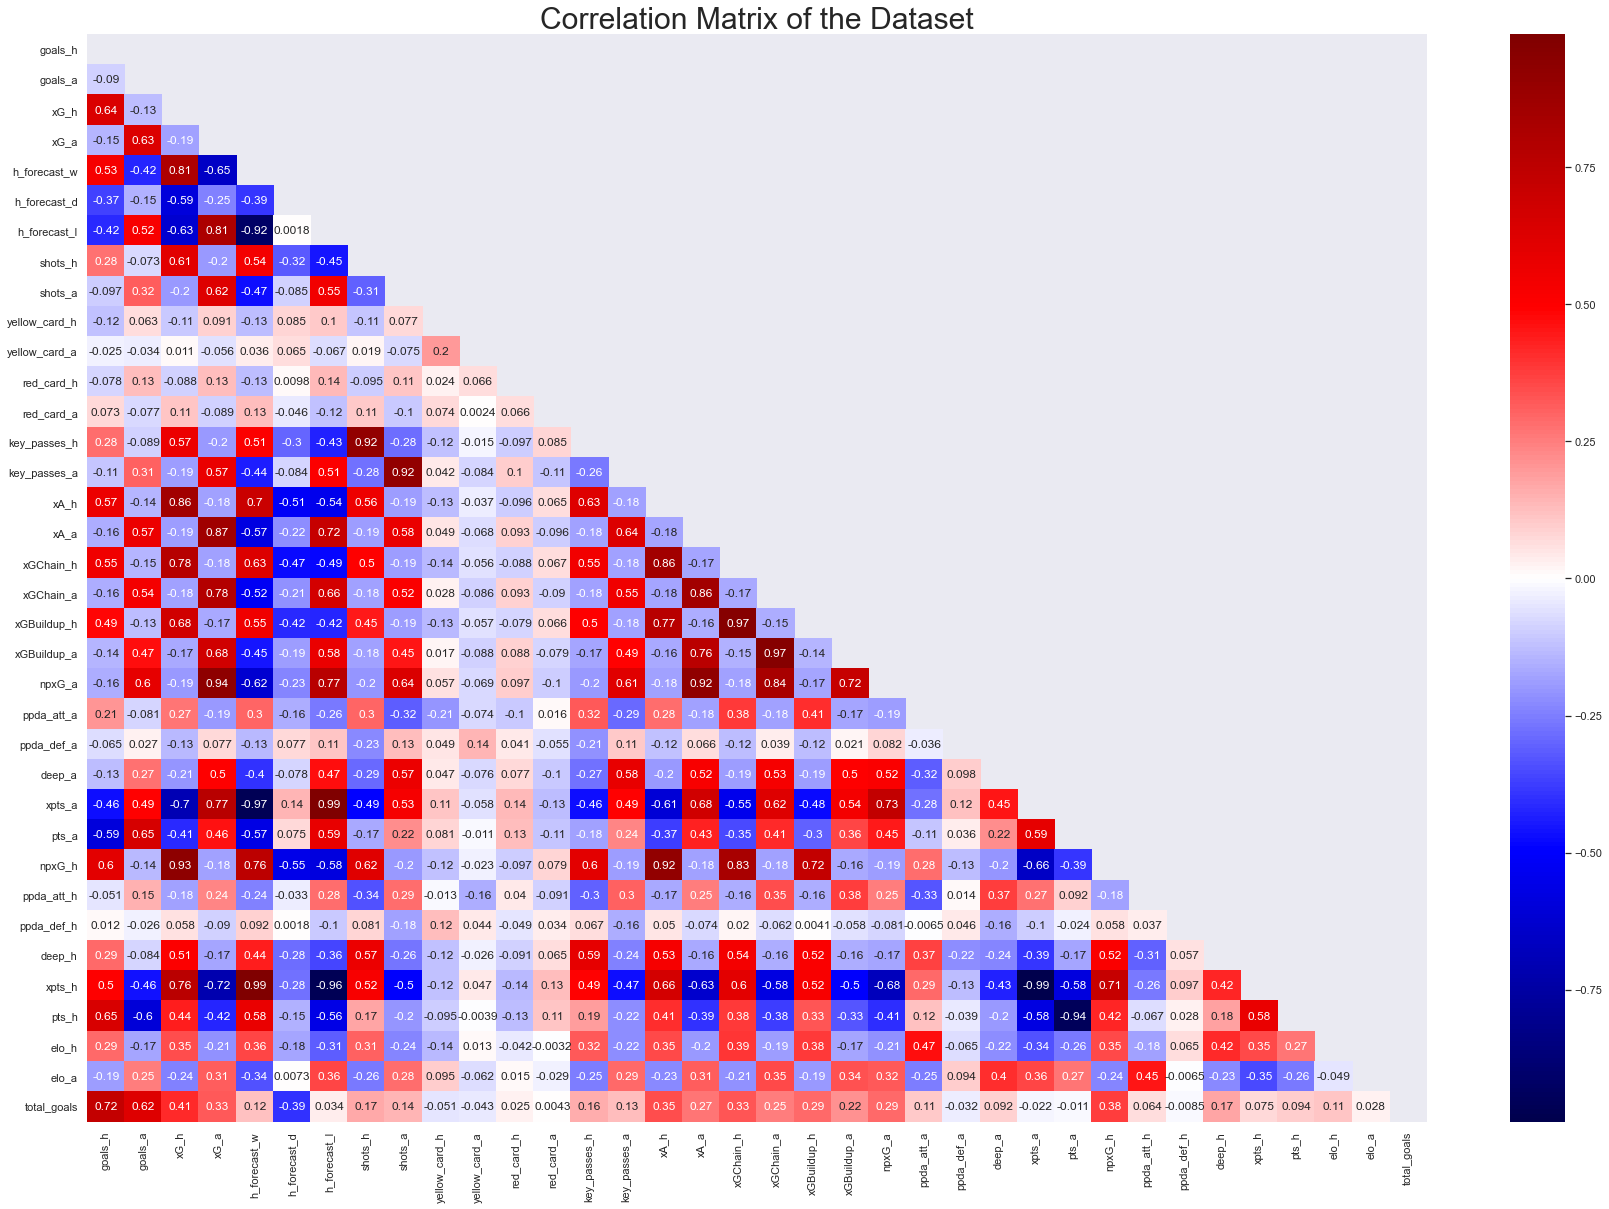

In [51]:
# Plotting correlation matrix for all the features in the dataset 

mask = np.triu(np.ones_like(data.drop(['id', 'isResult', 'datetime', 'team_h', 
                       'team_a', 'id_h', 'id_a', 'league', 'match_id'], axis=1).corr(), dtype=np.bool))

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data.drop(['id', 'isResult', 'datetime', 'team_h', 
                       'team_a', 'id_h', 'id_a', 'league', 'match_id'], axis=1).corr(), mask = mask, annot = True, cmap='seismic')

plt.title('Correlation Matrix of the Dataset', fontsize = 30)
plt.show()

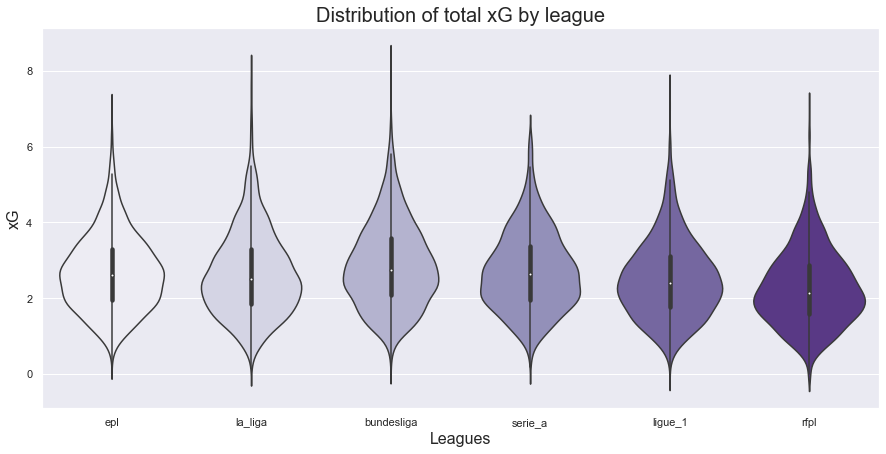

In [52]:
# Plotting distribution of xG by league

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data['league'], y = data['xG_h']+data['xG_a'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Leagues', fontsize = 16)
ax.set_ylabel(ylabel = 'xG', fontsize = 16)
ax.set_title(label = 'Distribution of total xG by league', fontsize = 20)
plt.show()

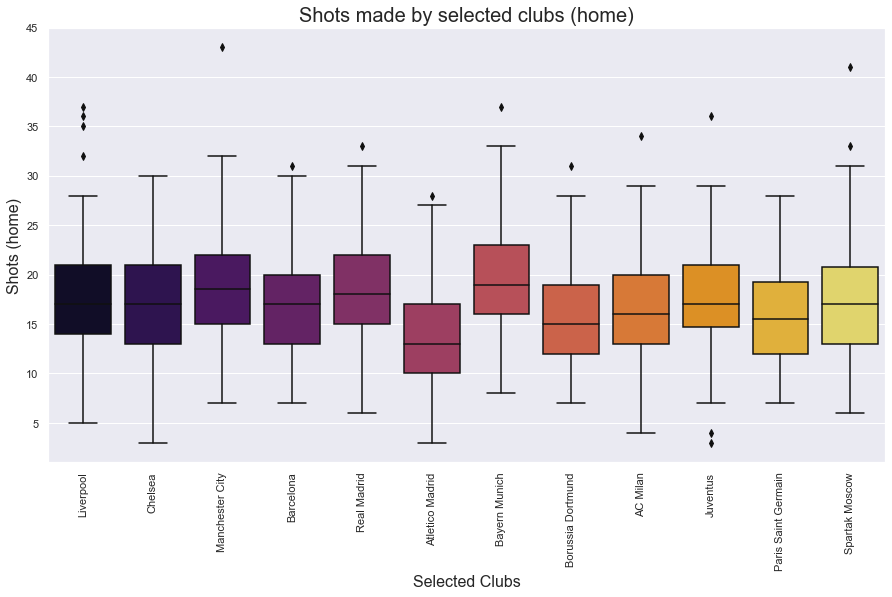

In [53]:
# Plotting shots made by some popular teams (home)

some_clubs = ('AC Milan', 'Atletico Madrid', 'Barcelona', 'Bayern Munich', 'Borussia Dortmund', 'Chelsea',
             'Juventus', 'Liverpool', 'Manchester City', 'Paris Saint Germain', 'Real Madrid', 'Spartak Moscow')

data_shots = data.loc[data['team_h'].isin(some_clubs) & data['shots_h']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_shots['team_h'], y = data_shots['shots_h'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Selected Clubs', fontsize = 16)
ax.set_ylabel(ylabel = 'Shots (home)', fontsize = 16)
ax.set_title(label = 'Shots made by selected clubs (home)', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

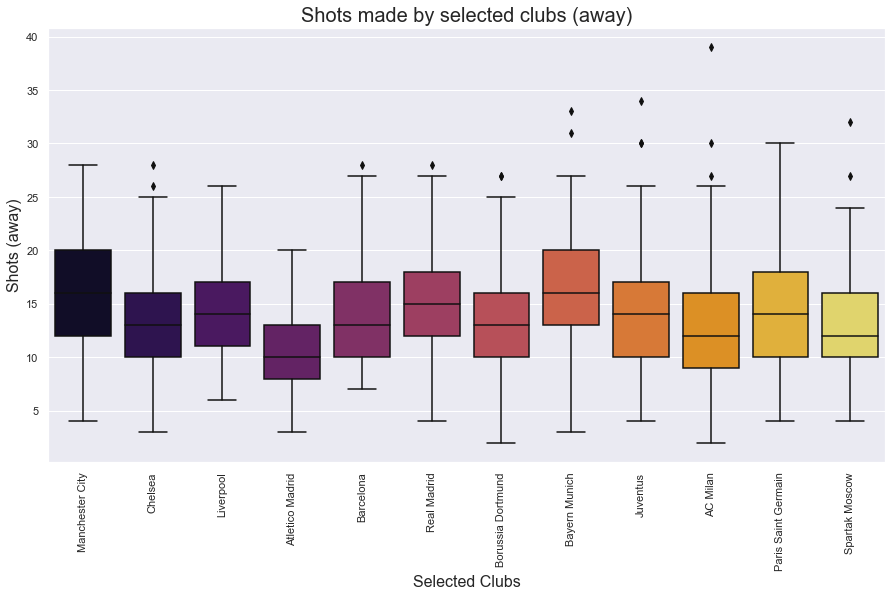

In [54]:
# Plotting shots made by some popular teams (away)

some_clubs = ('AC Milan', 'Atletico Madrid', 'Barcelona', 'Bayern Munich', 'Borussia Dortmund', 'Chelsea',
             'Juventus', 'Liverpool', 'Manchester City', 'Paris Saint Germain', 'Real Madrid', 'Spartak Moscow')

data_shots = data.loc[data['team_a'].isin(some_clubs) & data['shots_a']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_shots['team_a'], y = data_shots['shots_a'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Selected Clubs', fontsize = 16)
ax.set_ylabel(ylabel = 'Shots (away)', fontsize = 16)
ax.set_title(label = 'Shots made by selected clubs (away)', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

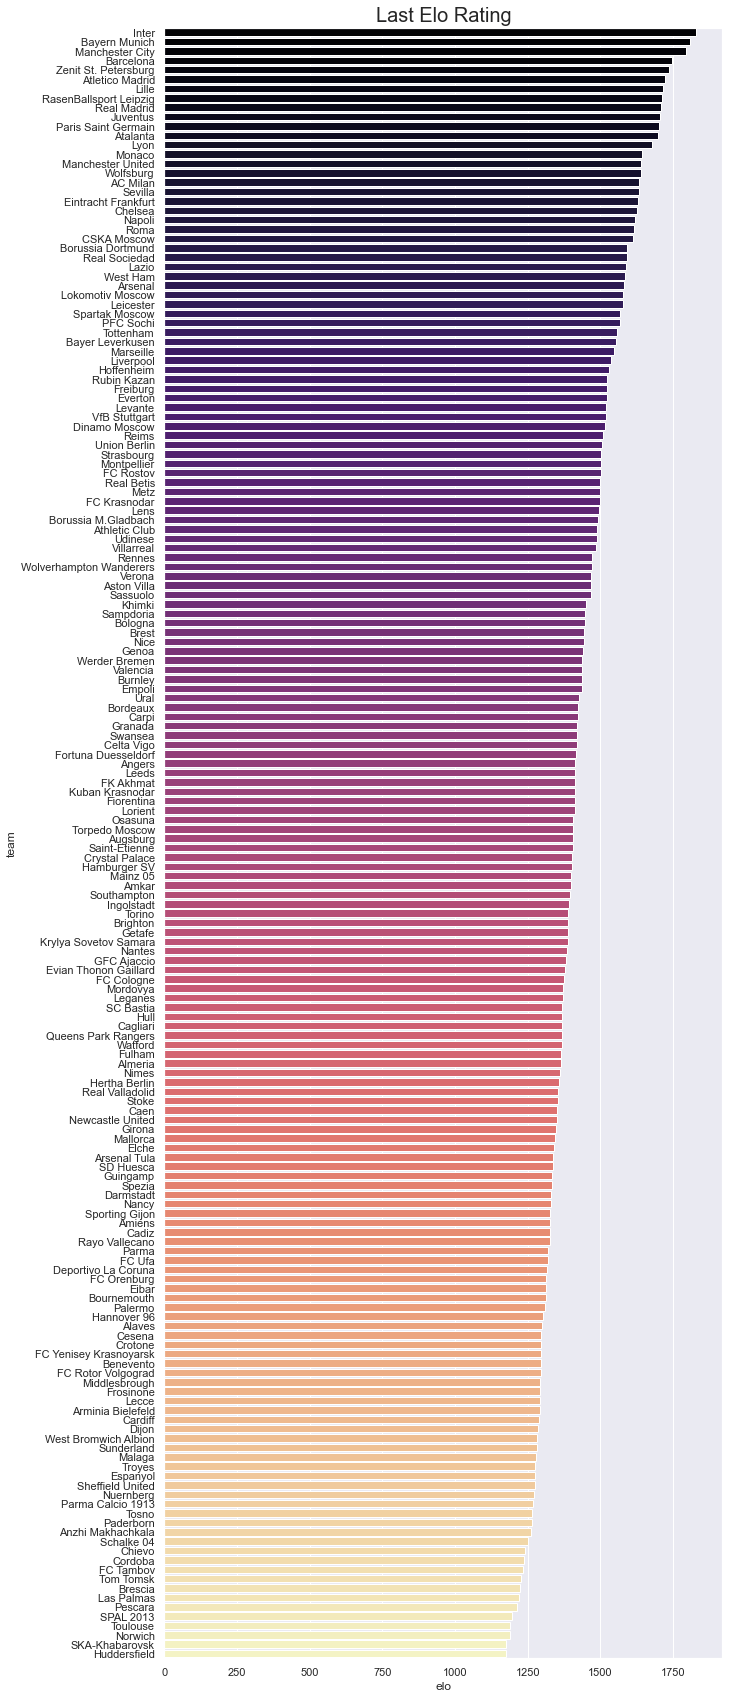

In [13]:
# Plotting last elo rating of a team

temp = data[['datetime', 'team_h', 'elo_h']]
temp2 = data[['datetime', 'team_a', 'elo_a']]

g = temp.groupby('team_h')
g2 = temp2.groupby('team_a')

temp = g.tail(1).drop_duplicates().sort_values('team_h').reset_index(drop=True)
temp2 = g2.tail(1).drop_duplicates().sort_values('team_a').reset_index(drop=True)

temp.columns = ['datetime', 'team', 'elo']
temp2.columns = ['datetime', 'team', 'elo']

temp = pd.concat([temp, temp2], ignore_index=True)
g = temp.groupby('team')
temp = g.tail(1).drop_duplicates().sort_values('elo', ascending=False).reset_index(drop=True)

plt.rcParams['figure.figsize'] = (10, 30)
sns.barplot(x="elo", y="team", data=temp, palette = 'magma')
plt.title('Last Elo Rating', fontsize = 20)
plt.show()

In [14]:
# Listing the games with most total goals (10+)

temp=data[['datetime', 'team_h', 'team_a', 'goals_h', 'goals_a', 'total_goals']].sort_values('total_goals', ascending=False)
temp[temp['total_goals']>=10].style.background_gradient('Blues')

,datetime,team_h,team_a,goals_h,goals_a,total_goals
534,2015-12-20 19:00:00,Real Madrid,Rayo Vallecano,10,2,12
1377,2020-06-19 17:00:00,PFC Sochi,FC Rostov,10,1,11
764,2016-08-21 00:15:00,Sevilla,Espanyol,6,4,10
1547,2018-09-02 16:30:00,Barcelona,SD Huesca,8,2,10
4,2014-08-03 13:30:00,Dinamo Moscow,FC Rostov,7,3,10
285,2015-04-05 11:00:00,Real Madrid,Granada,9,1,10
307,2015-09-20 14:30:00,Mordovya,CSKA Moscow,4,6,10
31,2014-09-20 15:00:00,Deportivo La Coruna,Real Madrid,2,8,10
1108,2017-05-07 14:00:00,Lazio,Sampdoria,7,3,10
379,2015-05-23 19:30:00,Real Madrid,Getafe,7,3,10
